# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [261]:
import pandas as pd
%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [262]:
df=pd.read_csv('craftcans.csv', na_values=['Does not apply'])

## How many rows do you have in the data? What are the column types?

In [263]:
df.shape

(2416, 7)

In [264]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

In [265]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [266]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [267]:
df.ABV.value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [268]:
df.ABV


0        4.50%
1        4.90%
2        4.80%
3        6.00%
4        6.00%
5        5.60%
6        8.00%
7       12.50%
8        7.70%
9        4.20%
10       5.00%
11       6.60%
12       4.00%
13       5.50%
14       7.60%
15       5.10%
16       6.50%
17       6.00%
18       5.00%
19       5.20%
20       4.80%
21       7.20%
22       6.70%
23       4.90%
24       8.00%
25       7.50%
26       6.00%
27       8.00%
28       6.30%
29       5.80%
         ...  
2386     5.70%
2387     6.20%
2388     4.90%
2389     9.90%
2390     6.20%
2391     5.80%
2392     5.20%
2393     8.50%
2394     7.00%
2395     5.30%
2396     5.60%
2397     4.90%
2398     5.10%
2399     4.00%
2400     5.50%
2401     5.10%
2402     5.10%
2403     9.70%
2404     5.10%
2405     6.70%
2406     6.20%
2407     8.30%
2408     7.00%
2409     4.90%
2410     9.90%
2411     5.30%
2412     9.90%
2413     8.00%
2414     8.70%
2415     6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [269]:
df['ABV']=df.ABV.str.replace('%',"")

In [270]:
df.ABV

0        4.50
1        4.90
2        4.80
3        6.00
4        6.00
5        5.60
6        8.00
7       12.50
8        7.70
9        4.20
10       5.00
11       6.60
12       4.00
13       5.50
14       7.60
15       5.10
16       6.50
17       6.00
18       5.00
19       5.20
20       4.80
21       7.20
22       6.70
23       4.90
24       8.00
25       7.50
26       6.00
27       8.00
28       6.30
29       5.80
        ...  
2386     5.70
2387     6.20
2388     4.90
2389     9.90
2390     6.20
2391     5.80
2392     5.20
2393     8.50
2394     7.00
2395     5.30
2396     5.60
2397     4.90
2398     5.10
2399     4.00
2400     5.50
2401     5.10
2402     5.10
2403     9.70
2404     5.10
2405     6.70
2406     6.20
2407     8.30
2408     7.00
2409     4.90
2410     9.90
2411     5.30
2412     9.90
2413     8.00
2414     8.70
2415     6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [271]:
df['ABV']=df.ABV.astype(float)

In [272]:
df.ABV.dtype

dtype('float64')

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [273]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

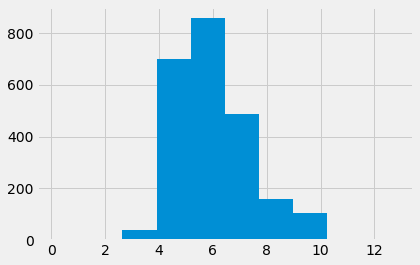

In [274]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [275]:
df[df.ABV.isnull()].shape

(68, 7)

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [276]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0


In [277]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [278]:
df[df.Location=='Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [279]:
df[df.Location=='Brooklyn, NY'].Brewery.value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [280]:
df[df.Brewery=='Sixpoint Craft Ales'].Style.value_counts().head(5)

American IPA                      4
Baltic Porter                     2
Cream Ale                         2
Rye Beer                          2
American Double / Imperial IPA    2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [281]:
df[df.Location.str.contains('.*NY', na=False)].Brewery.value_counts()

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
The Bronx Brewery                 3
KelSo Beer Company                3
Upstate Brewing Company           2
Montauk Brewing Company           2
Bomb Beer Company                 2
Chatham Brewing                   2
The Manhattan Brewing Company     1
Southampton Publick House         1
Newburgh Brewing Company          1
Dundee Brewing Company            1
Name: Brewery, dtype: int64

### Now *count* all of the breweries in New York state

In [282]:
df[df.Location.str.contains('.*NY', na=False)].Brewery.value_counts().shape

(16,)

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [283]:
df[df.Style.str.contains('.*IPA.*', na=False)].Beer

0                            Get Together
6                          Citra Ass Down
14                            Rico Sauvin
17                           Pile of Face
24                         Habitus (2014)
25                                  Solis
27                                Habitus
33                               Villager
38                                 HopArt
39                               Boy King
43                                 Rumble
45                                  Lasso
48                              Titan IPA
55                               Nordskye
59      98 Problems (Cuz A Hop Ain't One)
61                         Grapefruit IPA
62                           Train Hopper
71                               Thai.p.a
78                               The 26th
79                             The Gadget
86                             Galaxyfest
87                              Citrafest
89                             Gone A-Rye
92                     Linnaeus Ma

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [ ]:
df[df.Style.str.contains('.*IPA.*', na=False)].IBUs

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [289]:
#avg IBUs of IPAs
df[df.Style.str.contains('.*IPA.*', na=False)].IBUs.mean()

71.94897959183673

In [290]:
#avg IBUs of all beers
df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

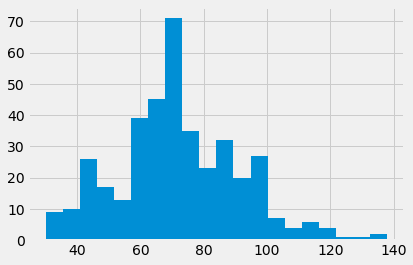

In [305]:
df[df.Style.str.contains('.*IPA.*', na=False)].IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [355]:
df.describe()

,ABV,IBUs
count,2348.000000,1405.000000
mean,5.977342,42.713167
std,1.354173,25.954066
min,0.100000,4.000000
25%,5.000000,21.000000
50%,5.600000,35.000000
75%,6.700000,64.000000
max,12.800000,138.000000


In [356]:
df[df.IBUs>64].sort_values(by='IBUs')

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2415,Dale's Pale Ale,Oskar Blues Brewery,"Longmont, CO",American Pale Ale (APA),12 oz.,6.5,65.0
648,Tropicalia,Creature Comforts,"Athens, GA",American IPA,12 oz.,6.5,65.0
1745,Dale's Pale Ale (10 Year Anniversary),Oskar Blues Brewery,"Longmont, CO",American Pale Ale (APA),12 oz.,6.5,65.0
1687,Dale's Pale Ale,Oskar Blues Brewery,"Longmont, CO",American Pale Ale (APA),19.2 oz.,6.5,65.0
1597,Outlaw IPA,Payette Brewing Company,"Garden City, ID",American IPA,12 oz.,6.2,65.0
1580,Dale's Pale Ale,Oskar Blues Brewery (North Carol...,"Brevard, NC",American Pale Ale (APA),12 oz.,6.5,65.0
1509,José Martí American Porter,Cigar City Brewing Company,"Tampa, FL",American Porter,12 oz.,8.0,65.0
1501,Nebraska India Pale Ale,Nebraska Brewing Company,"Papillion, NE",American IPA,12 oz.,6.5,65.0
1483,Dale's Pale Ale,Oskar Blues Brewery (North Carol...,"Brevard, NC",American Pale Ale (APA),19.2 oz.,6.5,65.0
1400,Dale's Pale Ale,Oskar Blues Brewery,"Longmont, CO",American Pale Ale (APA),12 oz.,6.5,65.0


## List all of the beers with IBUs below the 25th percentile

In [357]:
df[df.IBUs<21].sort_values(by='IBUs')

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1303,Summer Solstice,Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
1860,Summer Solstice Cerveza Crema (2009),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
2339,Summer Solstice (2011),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
1903,Devils Tramping Ground Tripel,Aviator Brewing Company,"Fuquay-Varina, NC",Tripel,12 oz.,9.2,5.0
318,18th Anniversary Gose,Real Ale Brewing Company,"Blanco, TX",Gose,12 oz.,4.4,5.0
1061,Chickawawa Lemonale,Great River Brewery,"Davenport, IA",Fruit / Vegetable Beer,12 oz.,5.0,5.0
1340,Westbrook Gose,Westbrook Brewing Company,"Mt. Pleasant, SC",Gose,12 oz.,4.0,5.0
169,Yo Soy Un Berliner,Freetail Brewing Company,"San Antonio, TX",Berliner Weissbier,12 oz.,4.4,5.0
313,Mr. Blue Sky,Griffin Claw Brewing Company,"Birmingham, MI",American Pale Wheat Ale,16 oz.,4.5,6.0
1240,Weiss Trash Culture,New England Brewing Company,"Woodbridge, CT",Berliner Weissbier,12 oz.,3.4,6.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [326]:
df.groupby('Style').IBUs.median().sort_values(ascending=False, na_position='last')

Style
American Barleywine                    96.0
Russian Imperial Stout                 94.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Black Ale                     73.0
Belgian Strong Dark Ale                72.0
American Strong Ale                    70.0
American IPA                           69.0
English Stout                          66.0
American India Pale Lager              65.0
Belgian IPA                            61.0
English Barleywine                     60.0
Rye Beer                               57.0
Baltic Porter                          52.0
English Strong Ale                     52.0
American Double / Imperial Stout       51.0
English India Pale Ale (IPA)           47.0
American White IPA                     45.0
American Pale Ale (APA)                44.0
Extra Special / Strong Bitter (ESB)    41.0
California Common / Steam Beer         41.0
Old Ale                                40.0
American Stout            

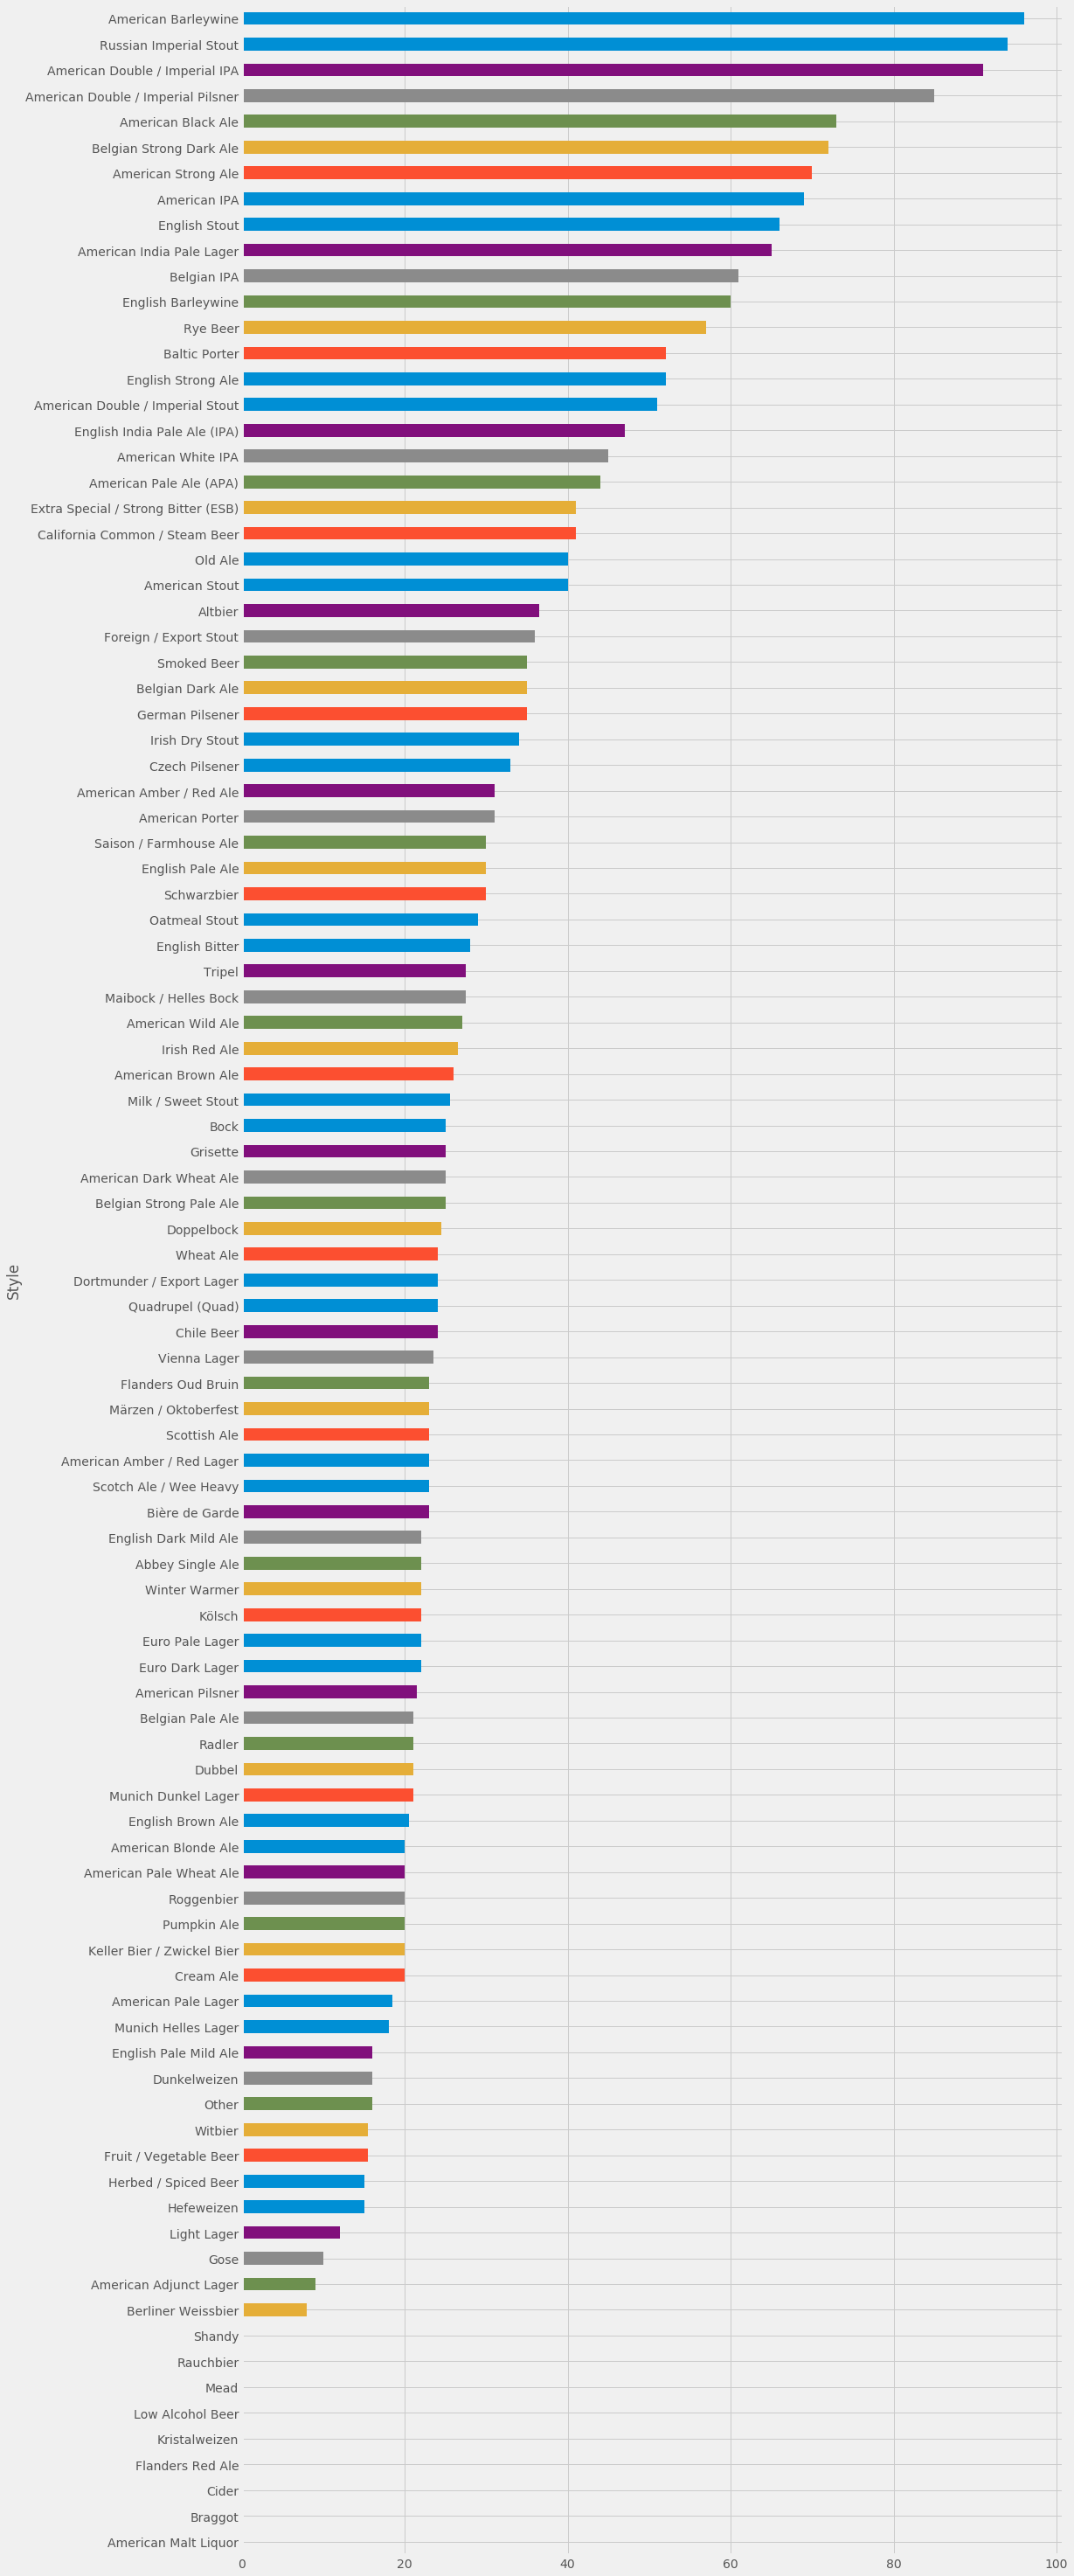

In [383]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

df.groupby('Style').IBUs.median().sort_values(ascending=True, na_position='first').plot(kind='barh', figsize = (15,50))


## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [358]:
#Low-IBU-beers
df[df.IBUs<21].sort_values(by='Style').Style.value_counts().head(5)

American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64

In [359]:
#High-IBU-beers
df[df.IBUs>64].sort_values(by='Style').Style.value_counts().head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [405]:
weat_beers=df[df.Style.isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]
weat_beers.IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

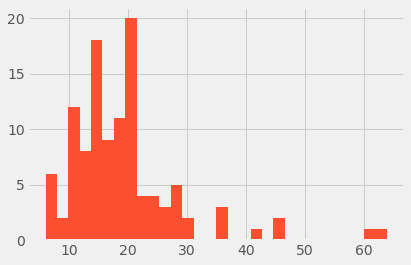

In [441]:
weat_beers.IBUs.hist(bins=30)
wheat_hist=weat_beers.IBUs.hist(bins=30)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [442]:
df[df.Style.str.contains('.*IPA.*', na=False)].IBUs.mean()

71.94897959183673

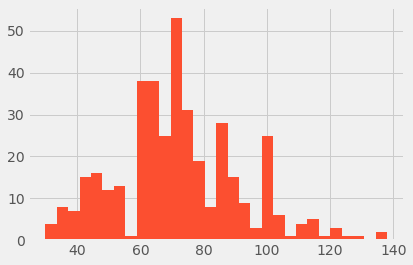

In [443]:
df[df.Style.str.contains('.*IPA.*', na=False)].IBUs.hist(bins=30)
ipa_hist= df[df.Style.str.contains('.*IPA.*', na=False)].IBUs.hist(bins=30)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

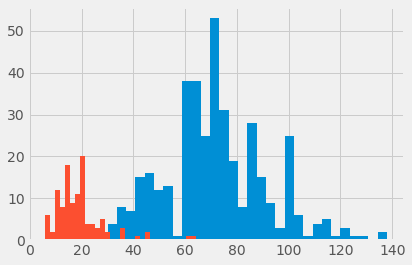

In [458]:
weat_beers.IBUs.hist(bins=30, ax=df[df.Style.str.contains('.*IPA.*', na=False)].IBUs.hist(bins=30))


## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

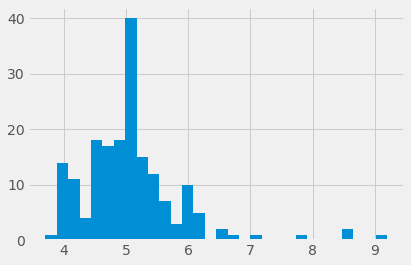

In [452]:
weat_beers.ABV.hist(bins=30)

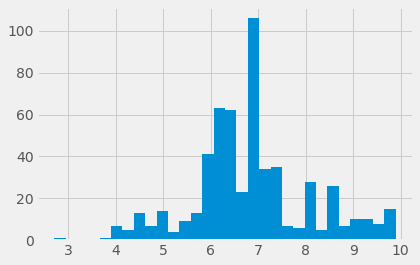

In [453]:
df[df.Style.str.contains('.*IPA.*', na=False)].ABV.hist(bins=30)


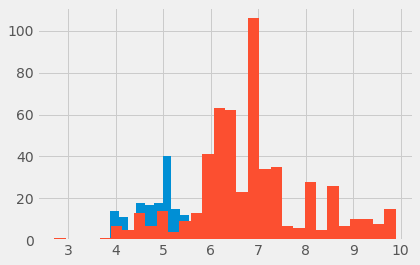

In [456]:
df[df.Style.str.contains('.*IPA.*', na=False)].ABV.hist(bins=30, ax=weat_beers.ABV.hist(bins=30))


## Good work!

If you made it this far you deserve a drink.